# Bike Shop Sales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data
Let`s take a look at the data

In [3]:
sales = pd.read_csv('../data/sales_data.csv', parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [35]:
sales.shape

(113036, 18)

In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [37]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


## Numerical analysis and visualization

What the prices are without VAT by country:

In [38]:
simplified_tax_rates = {
    'Canada': 5,
    'Australia': 10,
    'United States': 5,
    'Germany': 19,
    'France': 20,
    'United Kingdom': 20
}
sales['VAT'] = sales['Country'].map(simplified_tax_rates)
sales['Unit_Price_No_VAT'] = round(sales['Unit_Price'] * (1 - 1 / (sales['VAT']+100) * sales['VAT']), 2)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,VAT,Unit_Price_No_VAT
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,5,114.29
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,5,114.29
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,10,109.09
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,10,109.09
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,10,109.09


What is the biggest size of the order? What part of all orders are biggest orders?

In [39]:
biggest_order_size = sales['Order_Quantity'].max()
biggest_order_ratio = round(sales[sales['Order_Quantity'] == biggest_order_size].shape[0] / sales.shape[0] * 100, 2)
print(f'Biggest order size: {biggest_order_size}')
print(f'Ratio of biggest orders to all orders: {biggest_order_ratio}%')

Biggest order size: 32
Ratio of biggest orders to all orders: 0.23%


What are average orders by week days?

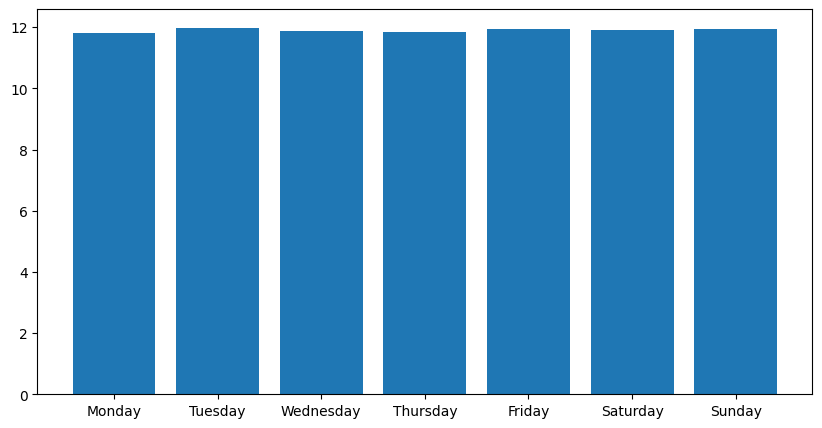

In [7]:
sales['Weekday'] = sales['Date'].dt.day_name()
sales_by_weekday = sales.groupby('Weekday').agg({'Order_Quantity': 'mean'}).reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = plt.figure(figsize=(10,5))
bar = plt.bar(x=weekdays, height=sales_by_weekday['Order_Quantity'])

Calculate and show in dynamic revenue by month and revenue growth by year

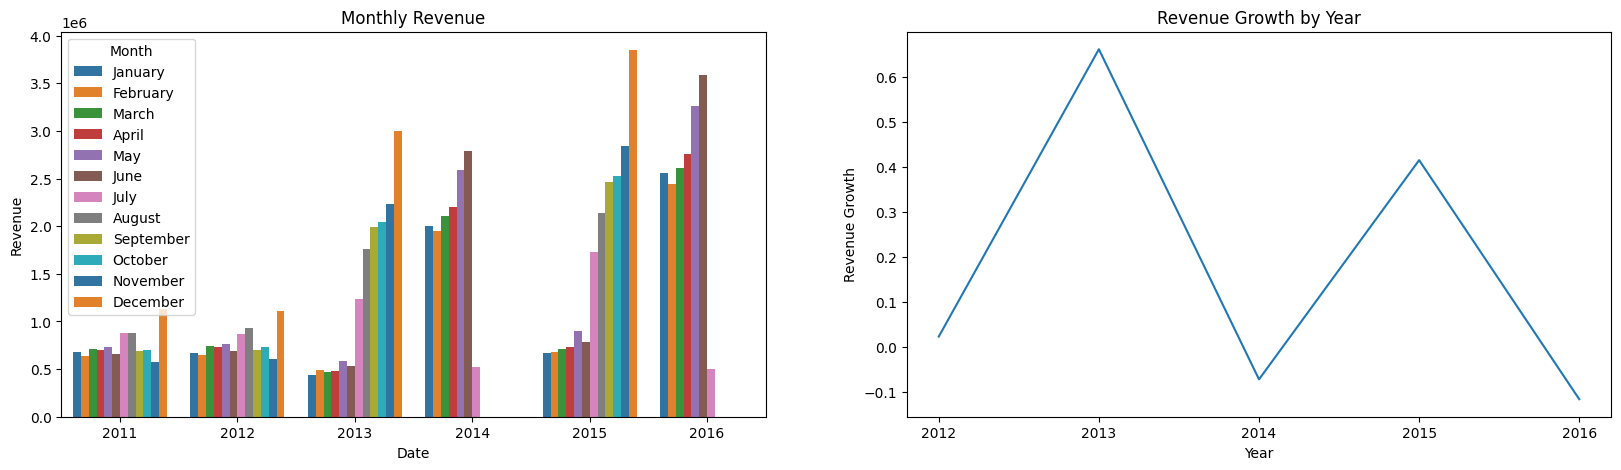

In [41]:
sales_rev = sales.groupby(['Month','Year'])['Revenue'].sum().reset_index(name='Monthly_Revenue')
fig, ax = plt.subplots(1,2, figsize=(20,5))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bar = sns.barplot(
    ax=ax[0],
    data=sales_rev,
    x='Year',
    y='Monthly_Revenue',
    hue='Month',
    hue_order=months_order,
    palette='tab10'
)
ax[0].set_title('Monthly Revenue')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Revenue')
sales_rev = sales.groupby('Year')['Revenue'].sum().reset_index(name='Yearly_Revenue')
sales_rev['Revenue_Growth'] = sales_rev.Yearly_Revenue / sales_rev.Yearly_Revenue.shift() - 1
plt.xticks(np.arange(2011,2017,1))
ax[1].plot(sales_rev['Year'],sales_rev['Revenue_Growth'])
ax[1].set_title('Revenue Growth by Year')
ax[1].set_xlabel('Year')
a = ax[1].set_ylabel('Revenue Growth')

What is average order value by month and running average order value

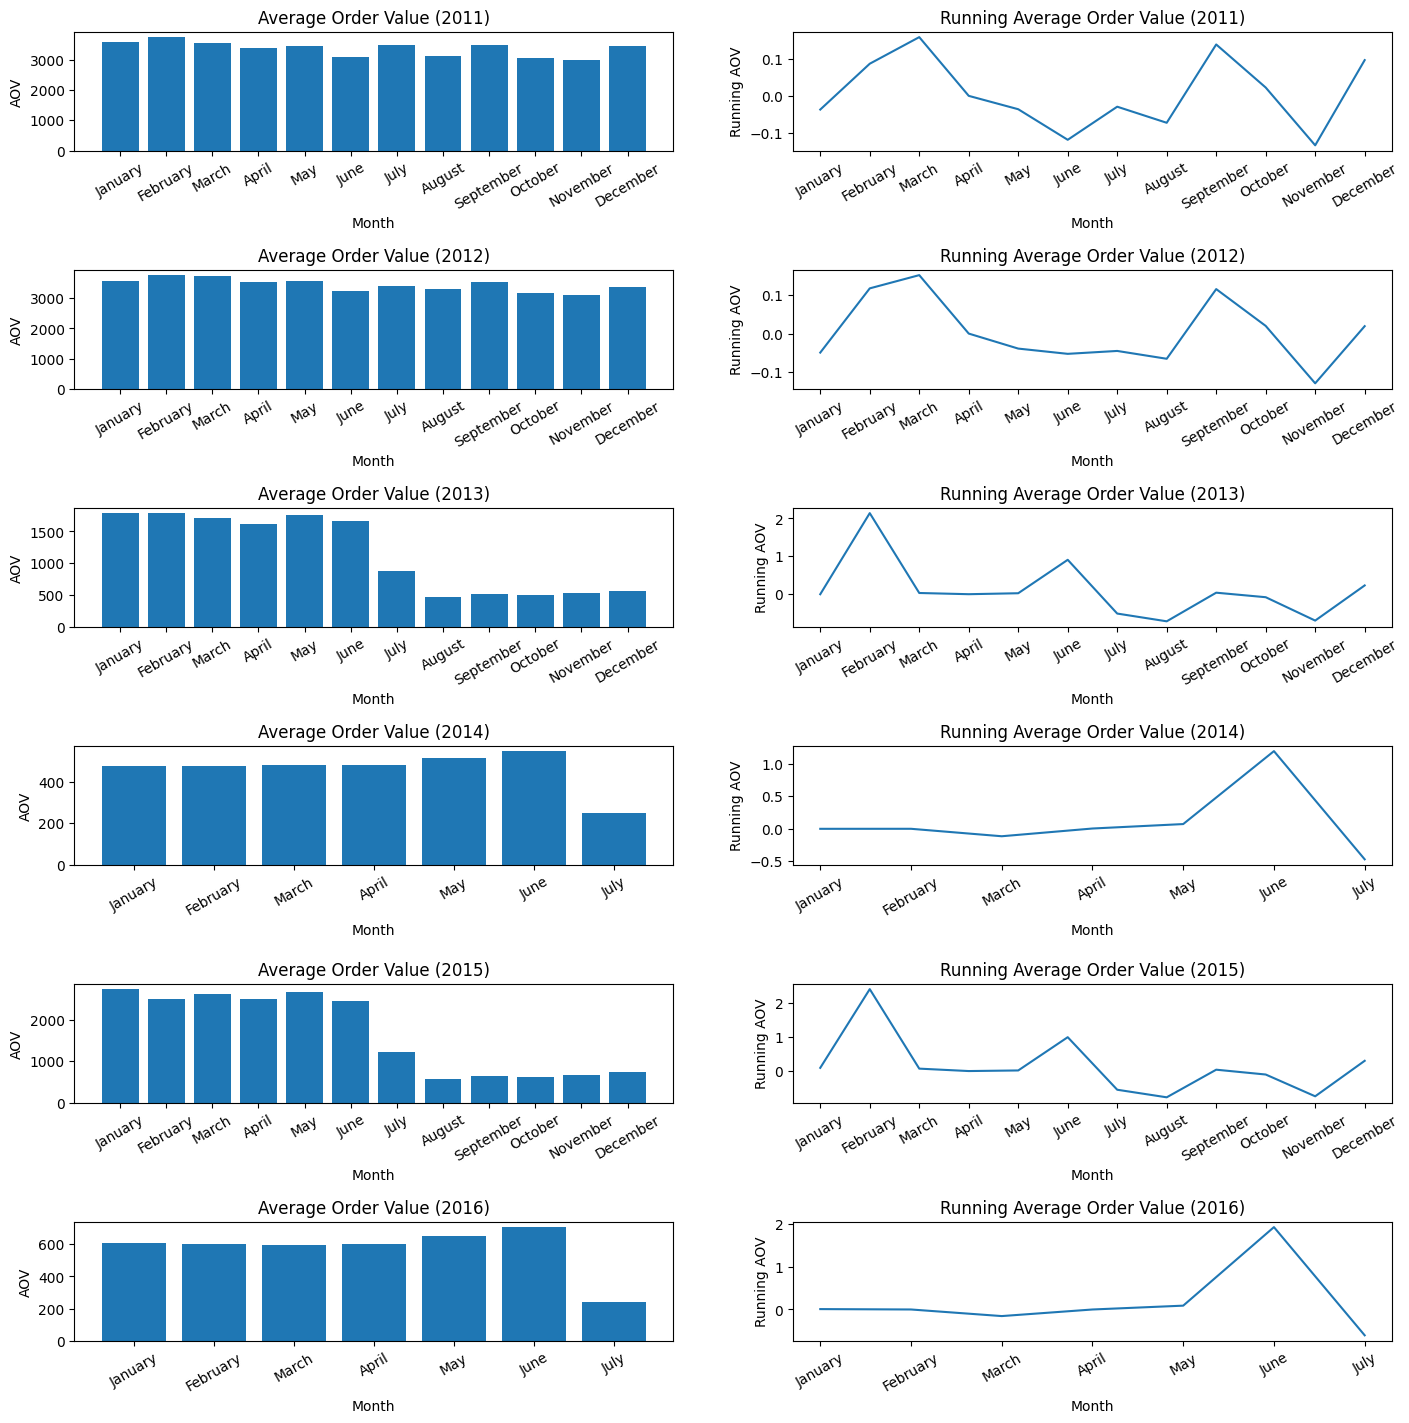

In [42]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def get_aov_data(year):
    sales_summarized = sales[sales['Year'] == year].groupby(['Month']).agg({
        'Revenue': 'sum',
        'Order_Quantity': 'count'
    })
    sales_summarized['AOV'] = round(sales_summarized.Revenue / sales_summarized.Order_Quantity, 2)
    sales_summarized['Running_AOV'] = round(sales_summarized.AOV / sales_summarized.AOV.shift() - 1, 4)
    sales_summarized.fillna(0, inplace=True)
    
    sales_summarized = sales_summarized.reindex(new_order, axis=0)
    return sales_summarized

aov_data = {
    2011: get_aov_data(2011),
    2012: get_aov_data(2012),
    2013: get_aov_data(2013),
    2014: get_aov_data(2014),
    2015: get_aov_data(2015),
    2016: get_aov_data(2016)
}

fig, axes = plt.subplots(6,2, figsize=(17,17))
fig.subplots_adjust(hspace=1)
line = 0
for year, data in aov_data.items():
    axes[line][0].bar(x=new_order, height=data['AOV'])
    axes[line][0].set_title(f'Average Order Value ({year})')
    axes[line][0].set_xlabel('Month')
    axes[line][0].set_ylabel('AOV')
    axes[line][0].tick_params(axis='x', labelrotation=30)
    axes[line][1].plot(data['Running_AOV'])
    axes[line][1].set_title(f'Running Average Order Value ({year})')
    axes[line][1].set_xlabel('Month')
    axes[line][1].set_ylabel('Running AOV')
    axes[line][1].tick_params(axis='x', labelrotation=30)
    line = line + 1

Show ten most popular products in April, 2016

In [43]:
sales[(sales['Year'] == 2016) & (sales['Month'] == 'April')].groupby('Product').size().reset_index(name='Amount').sort_values('Amount', ascending=False)[:10]

,Product,Amount
123,Water Bottle - 30 oz.,504
49,Patch Kit/8 Patches,481
23,Mountain Tire Tube,316
96,"Sport-100 Helmet, Black",192
0,AWC Logo Cap,189
98,"Sport-100 Helmet, Red",187
53,Road Tire Tube,173
97,"Sport-100 Helmet, Blue",171
6,Fender Set - Mountain,161
100,Touring Tire Tube,150


Total revenue received from the sale of each product for the entire period. Draw bar chart for 20 most popular products.

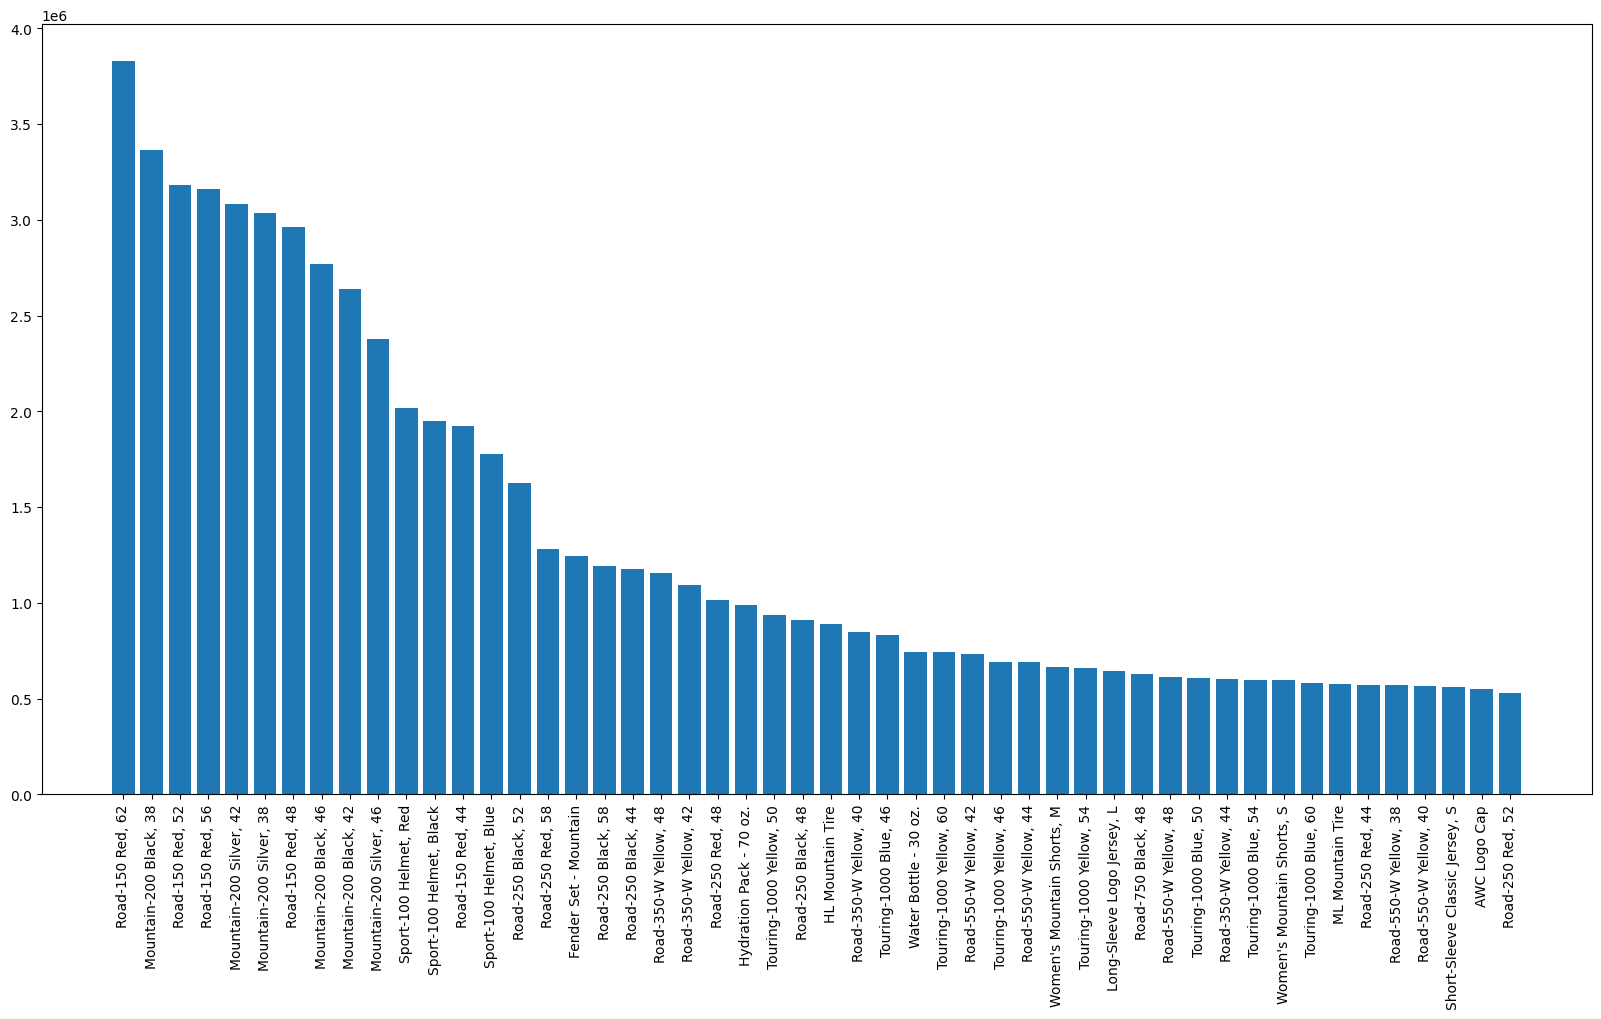

In [44]:
total_revenue = sales.agg({'Revenue': 'sum'})
sales_prod_rev = sales.groupby('Product').agg({'Revenue': 'sum'}).reset_index().sort_values('Revenue', ascending=False)
sales_prod_rev['Share_In_Revenue'] = sales_prod_rev.Revenue / total_revenue.iloc[0] * 100
sales_prod_rev_chunk = sales_prod_rev.head(50)
fig = plt.figure(figsize=(20,10))
plt.bar(sales_prod_rev_chunk['Product'],sales_prod_rev_chunk['Revenue'])
plt.tick_params(axis='x', labelrotation=90)

Show unit cost density with mean and median lines

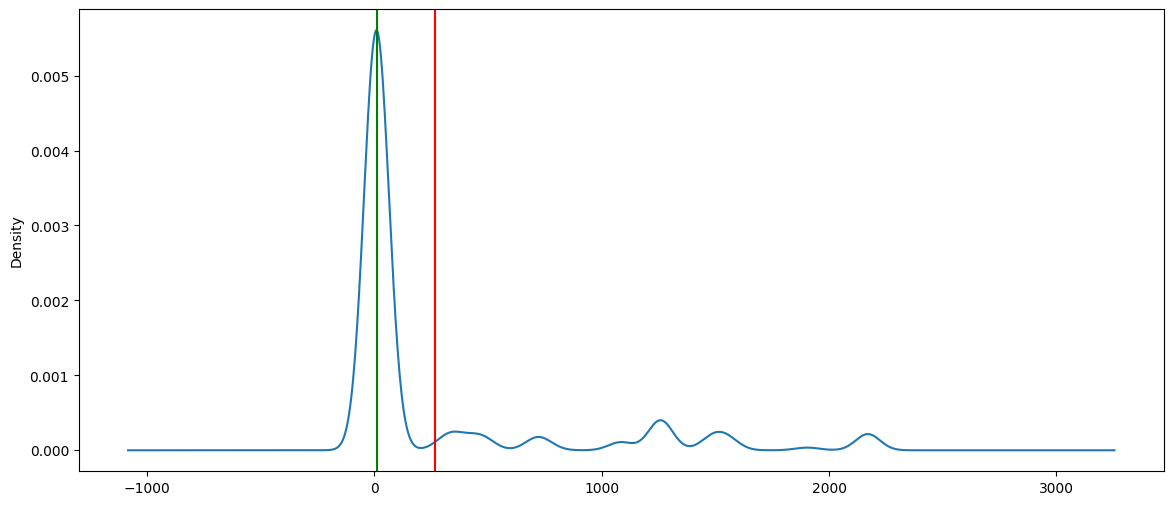

In [49]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
a = ax.axvline(sales['Unit_Cost'].median(), color='green')

## Categorical analysis and visualization

Group orders by `Age_group`

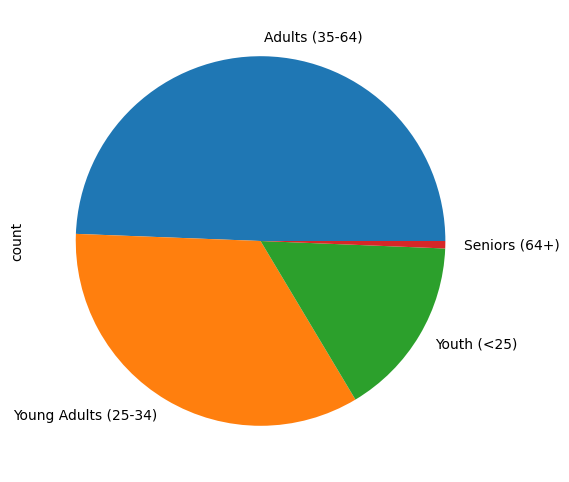

In [47]:
a = sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Show revenue distribution depends on customer age

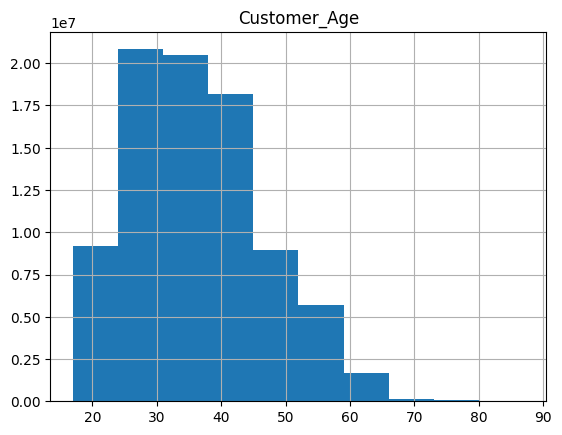

In [48]:
sales_age_rev = sales.groupby('Customer_Age').agg({'Revenue': 'sum'}).reset_index()
a = sales_age_rev.hist('Customer_Age', weights=sales_age_rev['Revenue'])